# <center> <span style="color:#f6f794"> 🧼 The purpose of this jupyter notebook is to create pipelines to clean raw data </span> </center>

- I'll check here if the pipelines of cleaning have sense so it can be put in a .py file and use this way in the architecture of the project
- Also, Some metrics will be done in order to know what to extract and give to the client
- Furthermore feature enginering will be made

_____

### <span style="color:#f6f794"> 📚 Importing libraries and setting displays </span>

In [1]:
import pandas as pd
import numpy as np
import requests
import gzip
from io import BytesIO
import os
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import time
import csv
import re
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import re
import unicodedata

### <span style="color:#f6f794"> 📂 Opening files and create dataframes of them </span>

In [2]:
# Setting paths
current_dir = os.getcwd()                            # \sentiment-analyzer-inc\eda
print(current_dir)
parent_dir = os.path.dirname(current_dir)            # \sentiment-analyzer-inc
print(parent_dir)
data_dir = os.path.join(current_dir, "data")         # \sentiment-analyzer-inc\eda\data
print(data_dir)
cleaning_file_path = os.path.join(current_dir, "")   # \sentiment-analyzer-inc\eda\data\
print(cleaning_file_path)

c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda\data
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda\


In [ ]:
# GITHUB_CLEAN_URL = "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_8r_mq50JNho.csv.gz"

# def load_airbnb_data_from_github(url):
#     """
GITHUB_CLEAN_URL = "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/eda/data/youtube_extract_final_ok.csv.gz"
#     1er intento con video:
#     Mr. Beast Mexico
#     https://www.youtube.com/watch?v-4GmbBoYQjE

#     2do intento con video:
#     Veredicto de trial de Diddy
#     https://www.youtube.com/watch?v=wQtb_NgXBUE

#     3er intento con video:
#     Fox news sobre ICE
#     https://www.youtube.com/watch?v=8r_mq50JNho

#     4to intento con video:
#     Luigi Mangione
#     https://www.youtube.com/watch?v=DRWnOlFS-X0

#     5to intento con video:
#     RTVE sobre Gaza
#     https://www.youtube.com/watch?v=shXNfU4aCjc

#     6to intento con video:
#     Andrew Tate vs Bonnie Blue [UNCENSORED]
#     https://www.youtube.com/watch?v=k8VVuRfbRAQ
#     """
#     print("⏯️ Downloading data from GitHub...")

#     try:
#         # Download the compressed CSV file from GitHub
#         response = requests.get(url)
#         response.raise_for_status()

#         print("⏯️ bar_chart: Processing compressed file..")

#         # Decompressing and reading the CSV file
#         with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
#             df = pd.read_csv(
#                 f,
#                 sep=',',                  # Specify the delimiter
#                 encoding='utf-8',         # Specify the encoding
#                 quoting=csv.QUOTE_MINIMAL # Specify the quoting behavior
#                 )

#         print(f"✅ white_check_mark: Data downloaded succesfully!")
        
#         return df

#     except requests.exceptions.RequestException as req_err:
#         print(f"⚠️ Network/Request Error while downloading data: {req_err}")
#         return None
#     except Exception as e:
#         print(f"⚠️ General Error while processing data: {e}")
#         return None

# # Creating dataframe from GitHub URL
# df_youtube_extract = load_airbnb_data_from_github(GITHUB_CLEAN_URL)

In [4]:
import requests
import gzip
import pandas as pd
import csv
from io import BytesIO

# List of GitHub URLs containing the compressed CSV files
GITHUB_URLS = [
    "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_8r_mq50JNho.csv.gz",
    "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/eda/data/youtube_comments_-4GmbBoYQjE.csv.gz",
    "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_wQtb_NgXBUE.csv.gz",
    "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_DRWnOlFS-X0.csv.gz",
    "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_shXNfU4aCjc.csv.gz",
    "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_k8VVuRfbRAQ.csv.gz"
]
def load_multiple_datasets_from_github(url_list):
   
    all_dataframes = []
    
    for url in url_list:
        print(f"⏯️ Downloading data from GitHub: {url}")
        
        try:
            # Download the compressed CSV file from GitHub
            response = requests.get(url)
            response.raise_for_status()

            print("⏯️ Processing compressed file...")

            # Decompress and read the CSV file
            with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
                df = pd.read_csv(
                    f,
                    sep=',',                  # Specify the delimiter
                    encoding='utf-8',         # Specify the encoding
                    quoting=csv.QUOTE_MINIMAL # Specify the quoting behavior
                )
            
            all_dataframes.append(df)
            print(f"✅ Successfully loaded data from: {url}")

        except requests.exceptions.RequestException as req_err:
            print(f"⚠️ Network/Request Error while downloading data from {url}: {req_err}")
        except Exception as e:
            print(f"⚠️ General Error while processing data from {url}: {e}")
    
    if not all_dataframes:
        print("⚠️ Warning: No data was loaded successfully")
        return None
    
    # Concatenate all dataframes vertically
    combined_df = pd.concat(all_dataframes, axis=0, ignore_index=True)
    print(f"\n✅ Successfully combined {len(all_dataframes)} datasets")
    print(f"📊 Total rows in combined dataset: {len(combined_df)}")
    
    return combined_df

# Creating dataframe from multiple GitHub URLs
df_youtube_extract = load_multiple_datasets_from_github(GITHUB_URLS)

df_youtube_extract.shape

⏯️ Downloading data from GitHub: https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_8r_mq50JNho.csv.gz
⏯️ Processing compressed file...
✅ Successfully loaded data from: https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_8r_mq50JNho.csv.gz
⏯️ Downloading data from GitHub: https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/eda/data/youtube_comments_-4GmbBoYQjE.csv.gz
⏯️ Processing compressed file...
✅ Successfully loaded data from: https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/eda/data/youtube_comments_-4GmbBoYQjE.csv.gz
⏯️ Downloading data from GitHub: https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_wQtb_NgXBUE.csv.gz
⏯️ Processing compressed file...
✅ Successfully loaded data from: https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/ed

(22247, 11)

___________
# <center> <span style="color:#f6f794">  🧹🧹🧹🧹🧹🧹🧹 START CLEANING 🧹🧹🧹🧹🧹🧹🧹 </center>
__________

In [5]:
df_youtube_extract.columns

Index(['threadId', 'commentId', 'videoId', 'author', 'authorChannelId',
       'isReply', 'parentCommentId', 'publishedAtComment', 'text',
       'likeCountComment', 'replyCount'],
      dtype='object')

In [6]:
df_youtube_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22247 entries, 0 to 22246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   threadId            22247 non-null  object 
 1   commentId           22247 non-null  object 
 2   videoId             22247 non-null  object 
 3   author              22230 non-null  object 
 4   authorChannelId     22247 non-null  object 
 5   isReply             22247 non-null  bool   
 6   parentCommentId     4175 non-null   object 
 7   publishedAtComment  22247 non-null  object 
 8   text                22244 non-null  object 
 9   likeCountComment    22247 non-null  int64  
 10  replyCount          18072 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 1.7+ MB


In [7]:
df_youtube_extract.sample(10)

threadId  \
15129  UgwNvgRyos_QSNZFfK94AaABAg   
9280   Ugx9_9C1QNle8HHrlhJ4AaABAg   
7941   UgwDN09qzETR9UmG4W54AaABAg   
7708   Ugx8QZHcMKkAVVBBDVt4AaABAg   
199    Ugwt6Phh0rLbT9lAYux4AaABAg   
10004  Ugy2MvNA5-yXCY1q7RR4AaABAg   
12569  UgwWenyRGymAG0wckTB4AaABAg   
3096   UgyJVJ22Hmd-F12hpPl4AaABAg   
13971  Ugx7razxe3OhQvJX2SF4AaABAg   
21307  Ugx9cL78VMbPhRGIhvx4AaABAg   

                                               commentId      videoId  \
15129                         UgwNvgRyos_QSNZFfK94AaABAg  k8VVuRfbRAQ   
9280   Ugx9_9C1QNle8HHrlhJ4AaABAg.AJm8hWxv7ZyAJmPvRUixI-  k8VVuRfbRAQ   
7941   UgwDN09qzETR9UmG4W54AaABAg.AJssYKJzflpAJsvu8PQPTZ  k8VVuRfbRAQ   
7708   Ugx8QZHcMKkAVVBBDVt4AaABAg.AJtqudiIamxAJttWRXoV_w  k8VVuRfbRAQ   
199                           Ugwt6Phh0rLbT9lAYux4AaABAg  8r_mq50JNho   
10004                         Ugy2MvNA5-yXCY1q7RR4AaABAg  k8VVuRfbRAQ   
12569                         UgwWenyRGymAG0wckTB4AaABAg  k8VVuRfbRAQ   
3096                          UgyJVJ22Hmd-F12hpPl4AaABAg  wQtb_NgXBUE   
13971                         Ugx7razxe3OhQvJX2SF4AaABAg  k8VVuRfbRAQ   
21307                         Ugx9cL78VMbPhRGIhvx4AaABAg  k8VVuRfbRAQ   

                      author           authorChannelId  isReply  \
15129                @JMan3W  UCLP4Wkd96Cj1eOHT8PoqV-w    False   
9280        @kpeezyforsheezy  UC3FH4ozdlHJsRDtcA-OLl_g     True   
7941                 @ej4381  UC7zbJWUjKtpsBQV-AF5jBdA     True   
7708               @enzoUKSC  UC8_KDXejUp3_1MPNLGdPCjA     True   
199         @ALEXANDER-e3z3n  UC-l0nWBH_gmBVjAkL1HvX0w    False   
10004       @jakegriffin9078  UC6ZFUpa_TYoZZQJfnFMTA4Q    False   
12569         @JoshTheMadLad  UCbWdUCJK7OpXwbxLsU0wwRw    False   
3096   @KimberlyMooney-ci8cc  UCp5Jynaa2LHj_MSFgJ7JwqQ    False   
13971     @heshaamedries6656  UCHiG-6_aMvoB-8t0vM1bAPQ    False   
21307       @skylerjacob4425  UC21ino0KiPD3KVI3C8_ZouQ    False   

                  parentCommentId    publishedAtComment  \
15129                         NaN  2025-06-21T23:06:42Z   
9280   Ugx9_9C1QNle8HHrlhJ4AaABAg  2025-06-25T04:52:53Z   
7941   UgwDN09qzETR9UmG4W54AaABAg  2025-06-27T17:36:31Z   
7708   Ugx8QZHcMKkAVVBBDVt4AaABAg  2025-06-28T02:34:54Z   
199                           NaN  2025-07-02T19:10:28Z   
10004                         NaN  2025-06-24T10:33:02Z   
12569                         NaN  2025-06-22T23:00:27Z   
3096                          NaN  2025-07-02T18:24:47Z   
13971                         NaN  2025-06-22T09:44:37Z   
21307                         NaN  2025-06-20T19:10:21Z   

                                                    text  likeCountComment  \
15129  Tate is playing chess whilst bob and Bonnie ar...                 0   
9280   This comment section is complete proof that pe...                 4   
7941        Men created the wars so they can fight them.                 0   
7708   Well his dad was one so he’s sorta one too but...                 1   
199                     🤬“Please REMEMBER THAT..." 🏃🏃🏃🏃🛬                 0   
10004  This is the best thing iv ever seen in my life...                 1   
12569  Fuck this was a great podcast. So refreshing s...                 0   
3096   She may be more hurt cause she loved him and w...                 0   
13971  Just confirms why you seeing more white women ...                 0   
21307  Tate is right tho.. Bonnie is just a consequen...                18   

       replyCount  
15129         0.0  
9280          NaN  
7941          NaN  
7708          NaN  
199           0.0  
10004         1.0  
12569         0.0  
3096          0.0  
13971         0.0  
21307         0.0

In [8]:
df_youtube_extract.shape # (22247, 11)

(22247, 11)

#### <span style="color:#F3A006"> 1️⃣ Columns </span>

- Column's names format: lowercase with underscore as spaces

In [9]:
# Changin the names to lowercase and with a underscore to as spaces to make it easier to work with.
df_youtube_extract.columns = (
    df_youtube_extract.columns
    .str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True)  # Insert underscore before each uppercase (except start)
    .str.lower()                                       # Convert all to lowercase
    .str.strip()                                       # Remove leading and trailing spaces in case there were any
)

In [10]:
df_youtube_extract.columns

Index(['thread_id', 'comment_id', 'video_id', 'author', 'author_channel_id',
       'is_reply', 'parent_comment_id', 'published_at_comment', 'text',
       'like_count_comment', 'reply_count'],
      dtype='object')

#### <span style="color:#F3A006"> 2️⃣ Duplicates </span>

- There are no duplicate columns

In [11]:
def handle_duplicates(df):
    """
    Handle duplicate rows in the dataset with updated column names.
    """
    df_clean = df.copy()
    
    # First, identify exact duplicates across all columns
    df_clean = df_youtube_extract.drop_duplicates()
    
    # Ensure each comment_id is unique
    df_clean = df_youtube_extract.drop_duplicates(subset=['comment_id'], keep='first')
    
    # Remove likely duplicates (same author, text, and timestamp)
    df_clean = df_youtube_extract.drop_duplicates(
        subset=['author', 'text', 'published_at_comment'], 
        keep='first'
    )
    
    return df_clean

# Handling duplicates in the dataset
df_youtube_extract = handle_duplicates(df_youtube_extract)


#### <span style="color:#F3A006">  3️⃣  Nulls </span>

In [12]:
# def analyze_nulls(df):
#     """
#     Analyze null values percentage and provide basic recommendations
#     on imputing or dropping, column by column.
#     """
#     total_rows = len(df)
#     report = []

#     for col in df.columns:
#         null_count = df[col].isna().sum()
#         null_pct = null_count / total_rows * 100
        
#         if null_count == 0:
#             recommendation = "No missing values"
#         else:
#             # Basic heuristic recommendations
#             if col in ['thread_id', 'comment_id', 'video_id', 'text']:
#                 recommendation = "Drop rows with nulls (IDs or text)"
#             elif col in ['author', 'author_channel_id']:
#                 if null_pct < 5:
#                     recommendation = "Impute with 'unknown' or similar"
#                 else:
#                     recommendation = "High missing rate: consider data quality issues"
#             elif col == 'is_reply':
#                 recommendation = "Impute with False if missing means no reply"
#             elif col == 'parent_comment_id':
#                 recommendation = "Keep nulls (not a reply indicator)"
#             elif col == 'published_at_comment':
#                 if null_pct < 1:
#                     recommendation = "Drop rows with null timestamps"
#                 else:
#                     recommendation = "Consider flag + placeholder or investigate further"
#             elif col in ['like_count_comment', 'reply_count']:
#                 recommendation = "Impute with 0 (absence = zero engagement)"
#             else:
#                 recommendation = "Check context; impute or drop accordingly"
        
#         report.append({
#             "column": col,
#             "null_count": null_count,
#             "null_percentage": round(null_pct, 2),
#             "recommendation": recommendation
#         })
    
#     return report

# # Calling the function to analyze nulls
# null_analysis_report = analyze_nulls(df_youtube_extract)
# null_analysis_report

In [13]:
def handle_nulls(df):
    
    df_clean = df.copy()

    null_handling_strategies = {
        # IDs - must exist, drop rows if null
        'thread_id': {'action': 'drop'},
        'comment_id': {'action': 'drop'},
        'video_id': {'action': 'drop'},

        # Author info - fill with 'unknown', but track frequency externally
        'author': {'action': 'fill', 'value': 'unknown'},
        'author_channel_id': {'action': 'fill', 'value': 'unknown'},

        # Boolean flag - assume False if missing, but validate assumption
        'is_reply': {'action': 'fill', 'value': False},

        # Parent comment ID - missing means no reply, leave as is
        'parent_comment_id': {'action': 'leave'},

        # Timestamp - drop if missing values are few, otherwise impute and flag
        'published_at_comment': {'action': 'conditional_drop', 'threshold': 0.05},

        # Text - no text means no analysis, drop such rows
        'text': {'action': 'drop'},

        # Engagement metrics - fill missing values with zero
        'like_count_comment': {'action': 'fill', 'value': 0},
        'reply_count': {'action': 'fill', 'value': 0}
    }

    for column, strategy in null_handling_strategies.items():
        if column not in df_clean.columns:
            continue

        action = strategy['action']
        if action == 'drop':
            # Drop rows where this column is null
            df_clean = df_clean.dropna(subset=[column])
        elif action == 'fill':
            # Fill nulls with specified value
            df_clean[column] = df_clean[column].fillna(strategy['value'])
        elif action == 'leave':
            # Do nothing for this column
            continue
        elif action == 'conditional_drop':
            # Calculate ratio of nulls in this column
            null_ratio = df_clean[column].isna().mean()
            threshold = strategy.get('threshold', 0)
            if null_ratio <= threshold:
                # If nulls are under threshold, drop those rows
                df_clean = df_clean.dropna(subset=[column])
            else:
                # If many nulls, fill with a placeholder and add a flag column
                fill_value = pd.Timestamp('1970-01-01')  # placeholder date
                df_clean[column + '_was_null'] = df_clean[column].isna()
                df_clean[column] = df_clean[column].fillna(fill_value)

    return df_clean

In [14]:
# Handling nulls in the dataset
df_youtube_extract = handle_nulls(df_youtube_extract)

#### <span style="color:#F3A006"> 4️⃣ Changing the data types </span>

- DateTime: 
    - published_at

In [15]:
df_youtube_extract.dtypes

thread_id                object
comment_id               object
video_id                 object
author                   object
author_channel_id        object
is_reply                   bool
parent_comment_id        object
published_at_comment     object
text                     object
like_count_comment        int64
reply_count             float64
dtype: object

In [16]:
df_youtube_extract.head(2)

thread_id  \
0  UgyNDD3xAKnE0SFOO314AaABAg   
1  UgyNDD3xAKnE0SFOO314AaABAg   

                                          comment_id     video_id     author  \
0                         UgyNDD3xAKnE0SFOO314AaABAg  8r_mq50JNho   @FoxNews   
1  UgyNDD3xAKnE0SFOO314AaABAg.AK41dJ9HkFMAK4688VFytt  8r_mq50JNho  @rh-sd7tf   

          author_channel_id  is_reply           parent_comment_id  \
0  UCXIJgqnII2ZOINSWNOGFThA     False                         NaN   
1  UC0Mo02Lr8_zEBRmnwA8Nj-w      True  UgyNDD3xAKnE0SFOO314AaABAg   

   published_at_comment                                               text  \
0  2025-07-02T10:26:16Z  Read more: https://www.foxnews.com/politics/se...   
1  2025-07-02T11:05:34Z  You mean Alligator Auschwitz? Republican Nazis...   

   like_count_comment  reply_count  
0                  24          6.0  
1                   1          0.0

In [17]:
def convert_data_types(df, conversions):
   
    df_copy = df.copy()
    
    for col, conversion in conversions.items():
        if col not in df_copy.columns:
            continue
        try:
            if callable(conversion):
                df_copy[col] = conversion(df_copy[col])
            else:
                df_copy[col] = df_copy[col].astype(conversion)
        except Exception as e:
            print(f"Warning: Could not convert column '{col}': {e}")
    
    return df_copy

In [18]:
conversions = {
    'published_at_comment': lambda col: pd.to_datetime(col, errors='coerce'),
    'like_count_comment': 'int',
    'reply_count': 'int',
    'is_reply': 'bool',
    'author_channel_id': 'string'
}

df_youtube_extract = convert_data_types(df_youtube_extract, conversions)


#### <span style="color:#F3A006"> 5️⃣ Eliminating invisible row breakes </span>

In [19]:
# Eliminating row breaks and extra spaces in the comments
def remove_line_breaks(df, columns):
    
    df_copy = df.copy()
    
    for col in columns:
        if col in df_copy.columns:
            df_copy[col] = df_copy[col].str.replace(r'[\r\n]+', ' ', regex=True).str.strip()
    
    return df_copy

# Calling the function to remove line breaks
df_youtube_extract = remove_line_breaks(df_youtube_extract, ['text'])

#### <span style="color:#F3A006"> 6️⃣ Feature Enginering </span>

- <span style="color:#D63A7E"> ['comment_length'] </span>
- <span style="color:#D63A7E"> ['word_count']</span>

In [20]:
def create_colums_lentgh(df):
    df['comment_length'] = df['text'].apply(lambda x: len(str(x)))    # How many characters in the comment
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split())) # How many words in the comment

# Call function
create_colums_lentgh(df_youtube_extract)

- <span style="color:#D63A7E"> ['has_emoji'] </span>  
- <span style="color:#D63A7E">['has_url'] </span> 
- <span style="color:#D63A7E">['has_special_char']</span> 

In [21]:
# Checking for emojis in column 'text' since it might indicate sentiment and influence the model
EMOJI_PATTERN = re.compile(
    "[\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"   # symbols & pictographs
    "\U0001F680-\U0001F6FF"   # transport & map symbols
    "\U0001F1E0-\U0001F1FF"   # flags (iOS)
    "\U00002702-\U000027B0"   # Dingbats
    "\U000024C2-\U0001F251"   # Enclosed characters
    "]+", flags=re.UNICODE
)

# Checking for URLs in column 'text' since it might indicate sentiment and influence the model
URL_PATTERN = re.compile(r'https?://\S+|www\.\S+')

# Checking for special characters in column 'text' since it might indicate sentiment and influence the model
# the ?¿ and !¡ cannot be eliminated
SPECIAL_CHAR_PATTERN = re.compile(r'[^a-zA-Z0-9\s.,]')

# Function to flag features in 'text'
def extract_text_features(df):
    df['has_emoji'] = df['text'].apply(lambda x: bool(EMOJI_PATTERN.search(str(x))))
    df['has_url'] = df['text'].apply(lambda x: bool(URL_PATTERN.search(str(x))))
    df['has_special_char'] = df['text'].apply(lambda x: bool(SPECIAL_CHAR_PATTERN.search(str(x))))
    return df

df_youtube_extract = extract_text_features(df_youtube_extract)


- <span style="color:#D63A7E">['extracted_urls'] </span> 

    - Removing URL's from the text column since it makes noise for the model

In [22]:
def extract_and_remove_urls(df, text_column='text'):
    """
    1. Extracts URLs to new column 'extracted_urls' (as lists)
    2. Removes URLs from original text column
    3. Adds 'has_url' boolean flag
    """
    df = df.copy()
    
    # Extract URLs (store as list)
    df['extracted_urls'] = df[text_column].apply(
        lambda x: re.findall(r'https?://\S+|www\.\S+', str(x))
    )
    
    # Remove URLs from text (keep everything else)
    df[text_column] = df[text_column].apply(
        lambda x: re.sub(r'https?://\S+|www\.\S+', '', str(x))
    )
    
    # Add simple boolean flag
    df['has_url'] = df['extracted_urls'].apply(lambda x: len(x) > 0)
    
    return df

df_youtube_extract = extract_and_remove_urls(df_youtube_extract)

- <span style="color:#D63A7E"> ['is_self_promotional']</span> 

In [23]:
self_promo_keywords = {
    # English
    'en': [
        'check out my', 'subscribe to', 'follow me', 'visit my', 'link in bio',
        'watch my', 'support my', 'my channel', 'my content', 'please subscribe',
        'giveaway on my', 'join my', 'don’t forget to follow', 'my new video',
        'check my', 'like and subscribe', 'hit subscribe', 'sub to my',
        'drop a sub', 'my latest video', 'my socials', 'follow my', 'my page',
        'my profile', 'my website', 'my blog', 'my podcast', 'my merch'
    ],
    
    # Spanish
    'es': [
        'mira mi', 'suscríbete a', 'suscribete a','sígueme', 'sigueme', 'visita mi', 'enlace en bio',
        've mi', 'apoya mi', 'mi canal', 'mi contenido', 'por favor suscríbete',
        'sorteo en mi', 'únete a mi', 'no olvides seguir', 'mi nuevo video',
        'checa mi', 'dale like y suscríbete', 'suscribete', 'mis redes'
    ],
    
    # Hindi
    'hi': [
        'मेरा चैनल देखो', 'सब्सक्राइब करो', 'मुझे फॉलो करो', 'मेरी वेबसाइट देखो',
        'मेरा लिंक', 'मेरा वीडियो देखो', 'मेरे चैनल को सपोर्ट करो', 'मेरा कंटेंट',
        'कृपया सब्सक्राइब करें', 'मेरे चैनल से जुड़ें', 'मेरा नया वीडियो'
    ],
    
    # Portuguese
    'pt': [
        'confira meu', 'inscreva-se no', 'me siga', 'visite meu', 'link na bio',
        'assista meu', 'apoie meu', 'meu canal', 'meu conteúdo', 'por favor se inscreva',
        'sorteio no meu', 'junte-se ao meu', 'não esqueça de seguir'
    ],
    
    # French
    'fr': [
        'regarde mon', 'abonne-toi à', 'suis-moi', 'visite mon', 'lien en bio',
        'regarde ma', 'soutiens mon', 'ma chaîne', 'mon contenu', 'abonne-toi s\'il te plaît',
        'concours sur mon', 'rejoins mon', 'n\'oublie pas de suivre'
    ],
    
    # German
    'de': [
        'schau dir mein', 'abonniere', 'folge mir', 'besuche mein', 'link in bio',
        'sieh dir mein', 'unterstütze mein', 'mein kanal', 'mein inhalt', 'bitte abonnieren',
        'gewinnspiel auf mein', 'tritt mein bei', 'vergiss nicht zu folgen'
    ],
    
    # Russian
    'ru': [
        'посмотри мой', 'подпишись на', 'подпишись на меня', 'зайди на мой', 'ссылка в профиле',
        'посмотри мое', 'поддержи мой', 'мой канал', 'мой контент', 'пожалуйста подпишись',
        'конкурс на моем', 'присоединяйся к моему', 'не забудь подписаться'
    ],
    
    # Japanese
    'ja': [
        '私のチャンネルを見て', '登録して', 'フォローして', '私のサイトを見て',
        'プロフィールのリンク', '私の動画を見て', '私のチャンネルをサポートして', '私のコンテンツ',
        'チャンネル登録お願いします', '私の新しい動画'
    ],
    
    # Arabic
    'ar': [
        'شاهد قناتي', 'اشترك في', 'تابعني', 'زور موقعي', 'الرابط في البايو',
        'ادعم قناتي', 'قناتي', 'محتواي', 'من فضلك اشترك', 'انضم إلى قناتي',
        'لا تنسى المتابعة'
    ]
}

def is_self_promotional(text):
    if not isinstance(text, str):
        return False
        
    text = text.lower()
    # Check all languages
    for lang_keywords in self_promo_keywords.values():
        if any(phrase in text for phrase in lang_keywords):
            return True
    return False

df_youtube_extract['is_self_promotional'] = df_youtube_extract['text'].apply(is_self_promotional)

In [44]:
df_youtube_extract['is_self_promotional'].value_counts()

is_self_promotional
False    22199
True        27
Name: count, dtype: int64

- <span style="color:#D63A7E">['contains_tag']  </span> 

In [24]:
# Making a new column to detect wether the comment is tagging an account in the comment 
def contains_tag(text):
    return '@' in text

df_youtube_extract['contains_tag'] = df_youtube_extract['text'].apply(contains_tag)

df['sentiment_score'] = sentiment_results['compound']
    df['sentiment_type'] = sentiment_results['type']
    df['sentiment_intensity'] = sentiment_results['intensity']

Aqui se extraen ciertas cosas del texto para procesarlo por los modelos

In [25]:
df_youtube_extract.columns

Index(['thread_id', 'comment_id', 'video_id', 'author', 'author_channel_id',
       'is_reply', 'parent_comment_id', 'published_at_comment', 'text',
       'like_count_comment', 'reply_count', 'comment_length', 'word_count',
       'has_emoji', 'has_url', 'has_special_char', 'extracted_urls',
       'is_self_promotional', 'contains_tag'],
      dtype='object')

- <span style="color:#D63A7E"> ["is_toxic"]         </span> 
- <span style="color:#D63A7E"> ["is_severe_toxic"]  </span> 
- <span style="color:#D63A7E"> ["is_obscene"]       </span> 
- <span style="color:#D63A7E"> ["is_threat"]        </span> 
- <span style="color:#D63A7E"> ["is_insult"]        </span> 
- <span style="color:#D63A7E"> ["is_identity_hate"] </span> 

In [ ]:
from transformers import pipeline
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
import torch

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Setup device: GPU si disponible, sino CPU
device = 0 if torch.cuda.is_available() else -1
print(f"Usando dispositivo: {'GPU' if device == 0 else 'CPU'}")

# Cargar modelos solo una vez
print("Cargando modelo de toxicidad...")
tox_model = pipeline("text-classification", model="unitary/toxic-bert", device=device)
print("Modelo de toxicidad cargado.")

print("Cargando modelo de hate speech...")
hate_model = pipeline("text-classification", model="Hate-speech-CNERG/bert-base-uncased-hatexplain", device=device)
print("Modelo de hate speech cargado.")

# Auto-promoción keywords
self_promo_keywords = [
    # English - classic & trending
    'check out my', 'subscribe to', 'follow me', 'visit my', 'link in bio','watch my', 'support my', 'my channel', 'my content', 'please subscribe',
    'giveaway on my', 'join my', 'don’t forget to follow', 'smash that like button', 'hit that follow', 'drop a follow', 'drop a sub',
    'new vid out', 'new video just dropped', 'streaming now', 'live rn','peep my', 'come vibe with me', 'link below', 'bio link', 'linktree in bio',
    'shop my', 'merch drop', 'go cop that', 'catch me live', 'on my Twitch','go show some love', 'run it up', 'tap in', 'help me reach', 'goal of',
    'road to', 'tag a friend', 'turn on notifications', 'set reminder','support your girl', 'ya girl just dropped', 'this one’s 🔥 go watch',
    'comment “done” when', 'share this with', 'give me a boost', 'go like my latest', 'first 100 get', 'my latest collab with', 
    'exclusive on my', 'watch til the end', 'link in the comments', 'help me go viral', 'this deserves more views', 'blow this up', 'let’s get this trending',

    # Spanish
    'sígueme en', 'nuevo video en', 'link en mi bio', 'suscríbete a mi canal', 'apoya mi contenido', 'regalo en mi', 'estoy en vivo', 'dale like',
    'comparte esto', 'no olvides seguirme', 'nuevo en mi canal','contenido exclusivo en', 'haz clic en el enlace', 'enlace en la descripción',
    'streaming ahora', 'etiqueta a un amigo', 'mi último video', 'nueva colaboración en',

    # French
    'abonne-toi à', 'regarde ma vidéo', 'lien dans la bio', 'soutiens ma chaîne','je suis en live', 'nouvelle vidéo dispo', 'partage ça', 'like ma dernière',
    'rejoins-moi sur', 'nouveau contenu sur',

    # Portuguese
    'segue lá', 'link na bio', 'vídeo novo no', 'apoia meu conteúdo', 'canal novo no ar', 'compartilha aí', 'live agora', 'inscreva-se no',
    'confere lá no', 'conteúdo exclusivo no',

    # Hashtags & shorthand
    '#linkinbio', '#supportsmallcreators', '#newdrop', '#streamingnow','#newvideo', '#fyp', '#viral', '#boostme', '#letsgoooo', '#giveawaytime'
]


def is_self_promotional(text):
    text_l = text.lower()
    return any(kw in text_l for kw in self_promo_keywords)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower().strip()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)[:512]

def check_keywords(text):
    keywords_map = {
        'is_obscene': ['fuck', 'shit', 'bitch', 'asshole', 'bastard', 'dick', 'cock', 'pussy', 'cunt', 'bollocks'],
        'is_offensive': ['moron', 'stupid', 'idiot', 'dumb', 'loser', 'retard', 'imbecile', 'nitwit', 'blockhead'],
        'is_racist': ['racial_slur1', 'racial_slur2', 'ethnic_insult', 'go back to your country', 'you people'],
        'is_religious_hate': ['infidel', 'heathen', 'satanist', 'jihadist', 'heretic', 'blasphemer'],
        'is_sexist': ['feminazi', 'slut', 'whore', 'bimbo', 'skank', 'hoe', 'nag', 'gold digger']
    }
    flags = {}
    for col, kwlist in keywords_map.items():
        flags[col] = any(kw in text for kw in kwlist)
    return flags

def batch_predict(texts, batch_size=16):
    results = []
    print(f"Procesando {len(texts)} comentarios en batches de {batch_size}")
    for i in range(0, len(texts), batch_size):
        print(f"\n=== Procesando batch {i // batch_size + 1} ===")
        batch_texts = texts[i:i+batch_size]
        cleaned_texts = [clean_text(t) for t in batch_texts]

        print(f"Batch original: {batch_texts}")
        print(f"Batch limpiado: {cleaned_texts}")

        is_selfpromo_list = [is_self_promotional(t) for t in batch_texts]
        print(f"Self-promotional flags: {is_selfpromo_list}")

        tox_inputs = [txt for txt, promo in zip(cleaned_texts, is_selfpromo_list) if txt and not promo]
        hate_inputs = tox_inputs.copy()

        print(f"Textos a evaluar por modelos: {tox_inputs}")

        try:
            tox_out = tox_model(tox_inputs, top_k=None) if tox_inputs else []
            hate_out = hate_model(hate_inputs, top_k=None) if hate_inputs else []
        except Exception as e:
            print("ERROR procesando modelos en este batch:", e)
            tox_out, hate_out = [], []

        tox_index = 0
        hate_index = 0

        for idx, original_text in enumerate(batch_texts):
            res = {
                'is_self_promotional': is_selfpromo_list[idx],
                'is_toxic': False,
                'is_hate_speech': False,
                'is_insult': False,
                'is_threat': False,
                'has_hate_keywords': False,
                'is_obscene': False,
                'is_offensive': False,
                'is_racist': False,
                'is_religious_hate': False,
                'is_sexist': False,
                'toxic_score': 0.0,
                'hate_speech_score': 0.0,
                'final_toxic_flag': False
            }

            cleaned = cleaned_texts[idx]
            if cleaned and not is_selfpromo_list[idx]:
                try:
                    tox_res = tox_out[tox_index]
                    hate_res = hate_out[hate_index]
                    tox_index +=1
                    hate_index +=1

                    tox_scores = {d['label'].lower(): d['score'] for d in tox_res}
                    hate_scores = {d['label'].lower(): d['score'] for d in hate_res}

                    thresholds = {
                        'toxic': 0.65,
                        'hate_speech': 0.75,
                        'identity_hate': 0.7,
                        'insult': 0.7,
                        'threat': 0.8
                    }

                    res['is_toxic'] = tox_scores.get('toxic', 0) >= thresholds['toxic']
                    res['is_hate_speech'] = (hate_scores.get('hate_speech', 0) >= thresholds['hate_speech']) or (tox_scores.get('identity_hate', 0) >= thresholds['identity_hate'])
                    res['is_insult'] = tox_scores.get('insult', 0) >= thresholds['insult']
                    res['is_threat'] = tox_scores.get('threat', 0) >= thresholds['threat']
                    res['toxic_score'] = tox_scores.get('toxic', 0)
                    res['hate_speech_score'] = hate_scores.get('hate_speech', 0)

                    kw_flags = check_keywords(cleaned)
                    for k,v in kw_flags.items():
                        res[k] = v
                    res['has_hate_keywords'] = any(kw_flags.values())

                    res['final_toxic_flag'] = any([
                        res['is_toxic'],
                        res['is_hate_speech'],
                        res['is_insult'],
                        res['is_threat'],
                        res['has_hate_keywords']
                    ])
                except Exception as e:
                    print("Error evaluando resultados del modelo:", e)

            results.append(res)
    print("\n=== Fin del análisis por lotes ===")
    return results

# === BLOQUE DE EJECUCIÓN ===

# Verifica que el DataFrame esté definido
try:
    df_youtube_extract
except NameError:
    raise Exception("⚠️  df_youtube_extract no está definido. Debes cargarlo antes de ejecutar esto.")

assert 'text' in df_youtube_extract.columns, "La columna 'text' no existe en tu DataFrame"

# Ejecutar predicción
print("\n=== Iniciando análisis de toxicidad ===")
resultados = batch_predict(df_youtube_extract['text'].tolist(), batch_size=8)

# Combinar con DataFrame original sin duplicar una columna que se usó para mantene el orden
df_resultados = pd.DataFrame(resultados)
if 'is_self_promotional' in df_youtube_extract.columns:
    df_resultados = df_resultados.drop(columns=['is_self_promotional'])

df_youtube_toxic = pd.concat([df_youtube_extract.reset_index(drop=True), df_resultados], axis=1)

# Mostrar primeras filas
print("\n=== Análisis completado. Primeras filas del resultado ===")
print(df_youtube_toxic.head())

Usando dispositivo: CPU
Cargando modelo de toxicidad...
Modelo de toxicidad cargado.
Cargando modelo de hate speech...
Modelo de hate speech cargado.

=== Iniciando análisis de toxicidad ===
Procesando 22226 comentarios en batches de 8

=== Procesando batch 1 ===
Batch original: ['Read more: ', 'You mean Alligator Auschwitz? Republican Nazis and their concentration camps are only tolerated because of Fox News lies and brainwashing – republican propaganda has turned Americans into Nazis.', 'The FBI should have an app to reveal the users of this doxing ICE app.  Those users should be jailed and fed to aligators!', 'Treason', 'Classical fascist move trying to dehumanise people. I thought that only gang members and were supposed to be arrested first and they literally are raiding homedepos and farms.', 'CNN needs their FCC license remanded.', 'This is the point comrades !!👉 Record spending ! Record inflation ! Record debt !😂No end in sight !😅', 'With all this going on one can easily say th

In [34]:
df_youtube_toxic

thread_id  \
0      UgyNDD3xAKnE0SFOO314AaABAg   
1      UgyNDD3xAKnE0SFOO314AaABAg   
2      UgyNDD3xAKnE0SFOO314AaABAg   
3      UgyNDD3xAKnE0SFOO314AaABAg   
4      UgyNDD3xAKnE0SFOO314AaABAg   
...                           ...   
22221  Ugy_IY-yY8e7-SzlMXl4AaABAg   
22222  Ugy_IY-yY8e7-SzlMXl4AaABAg   
22223  UgzvgSahzs6TUrB_wq14AaABAg   
22224  UgyBubeHgTA-R3s5L_J4AaABAg   
22225  UgwfpEhB1tt26O1IxI54AaABAg   

                                              comment_id     video_id  \
0                             UgyNDD3xAKnE0SFOO314AaABAg  8r_mq50JNho   
1      UgyNDD3xAKnE0SFOO314AaABAg.AK41dJ9HkFMAK4688VFytt  8r_mq50JNho   
2      UgyNDD3xAKnE0SFOO314AaABAg.AK41dJ9HkFMAK4V7z7RooL  8r_mq50JNho   
3      UgyNDD3xAKnE0SFOO314AaABAg.AK41dJ9HkFMAK4mulTnQq3  8r_mq50JNho   
4      UgyNDD3xAKnE0SFOO314AaABAg.AK41dJ9HkFMAK5093To5BU  8r_mq50JNho   
...                                                  ...          ...   
22221  Ugy_IY-yY8e7-SzlMXl4AaABAg.AJaiyOl_P_QAJarvh8NtvG  k8VVuRfbRAQ   
22222  Ugy_IY-yY8e7-SzlMXl4AaABAg.AJaiyOl_P_QAJatlG2mkd2  k8VVuRfbRAQ   
22223                         UgzvgSahzs6TUrB_wq14AaABAg  k8VVuRfbRAQ   
22224                         UgyBubeHgTA-R3s5L_J4AaABAg  k8VVuRfbRAQ   
22225                         UgwfpEhB1tt26O1IxI54AaABAg  k8VVuRfbRAQ   

                   author         author_channel_id  is_reply  \
0                @FoxNews  UCXIJgqnII2ZOINSWNOGFThA     False   
1               @rh-sd7tf  UC0Mo02Lr8_zEBRmnwA8Nj-w      True   
2      @ClementePablo-f8f  UC94pzXJmkyXox9RxhvUNKjw      True   
3        @guysumpthin2974  UCq04UxZ-yS3Y4BsX6qIqLxg      True   
4        @darthsidius9631  UCYNGXwapdOb9pu9pceRl9HA      True   
...                   ...                       ...       ...   
22221    @MartinJusic-i2d  UCM58_pgjYzwUxINnS_FaZtA      True   
22222          @kris43123  UCCqneivAy12tBFsUwBwILIw      True   
22223        @itsdaksh500  UCxHSq4FpxeaItHUVrBEfjow     False   
22224            @skrrxzo  UCn8ba2G_-XKpbQmusBntbjA     False   
22225           @Him69905  UCKy6yaMGpoi2D9GRZLE1oZA     False   

                parent_comment_id      published_at_comment  \
0                             NaN 2025-07-02 10:26:16+00:00   
1      UgyNDD3xAKnE0SFOO314AaABAg 2025-07-02 11:05:34+00:00   
2      UgyNDD3xAKnE0SFOO314AaABAg 2025-07-02 14:44:00+00:00   
3      UgyNDD3xAKnE0SFOO314AaABAg 2025-07-02 17:28:05+00:00   
4      UgyNDD3xAKnE0SFOO314AaABAg 2025-07-02 19:32:30+00:00   
...                           ...                       ...   
22221  Ugy_IY-yY8e7-SzlMXl4AaABAg 2025-06-20 17:15:27+00:00   
22222  Ugy_IY-yY8e7-SzlMXl4AaABAg 2025-06-20 17:31:30+00:00   
22223                         NaN 2025-06-20 15:57:03+00:00   
22224                         NaN 2025-06-20 15:56:41+00:00   
22225                         NaN 2025-06-20 15:54:09+00:00   

                                                    text  like_count_comment  \
0                                            Read more:                   24   
1      You mean Alligator Auschwitz? Republican Nazis...                   1   
2      The FBI should have an app to reveal the users...                   0   
3                                                Treason                   3   
4      Classical fascist move trying to dehumanise pe...                   0   
...                                                  ...                 ...   
22221                                     Kingpro_gaming                   0   
22222                  Bottom are guy like you my friend                   0   
22223   most viewed podcast of the 21st century 🗣️🗣️ 🔥🔥🔥                   2   
22224                                       Can’t wait😂😂                   2   
22225                           This will be interesting                   0   

       ...  is_threat  has_hate_keywords  is_obscene  is_offensive  is_racist  \
0      ...      False              False       False         False      False   
1      ...      False              False 

ESQUILIBRANDO LOS DATOS

In [49]:
# Columnas objetivo
toxic_cols = [
    'is_toxic', 'is_hate_speech', 'is_insult', 'is_threat',
    'is_self_promotional', 'is_obscene', 'is_offensive',
    'is_racist', 'is_religious_hate', 'is_sexist', 'final_toxic_flag'
]

print("=== Porcentaje de True/False por columna ===")
for col in toxic_cols:
    if col in df_youtube_toxic.columns:
        try:
            col_data = df_youtube_toxic[col].fillna(False).astype(bool)
            true_count = int(col_data.sum())
            total = int(len(col_data))
            pct_true = 100 * true_count / total
            pct_false = 100 - pct_true
            print(f"{col}: ✅ True = {pct_true:.2f}%, False = {pct_false:.2f}% ({true_count} de {total})")
            # Now printing the total count of True values and false values
            print(f"{col}: Total True: {true_count}, Total False: {total - true_count}")
        except Exception as e:
            print(f"{col}: ⚠️ Error procesando la columna: {e}")
    else:
        print(f"{col}: ❌ No está en el DataFrame.")


=== Porcentaje de True/False por columna ===
is_toxic: ✅ True = 17.35%, False = 82.65% (3856 de 22226)
is_toxic: Total True: 3856, Total False: 18370
is_hate_speech: ✅ True = 0.85%, False = 99.15% (189 de 22226)
is_hate_speech: Total True: 189, Total False: 22037
is_insult: ✅ True = 3.26%, False = 96.74% (724 de 22226)
is_insult: Total True: 724, Total False: 21502
is_threat: ✅ True = 0.00%, False = 100.00% (0 de 22226)
is_threat: Total True: 0, Total False: 22226
is_self_promotional: ⚠️ Error procesando la columna: cannot convert the series to <class 'int'>
is_obscene: ✅ True = 5.12%, False = 94.88% (1139 de 22226)
is_obscene: Total True: 1139, Total False: 21087
is_offensive: ✅ True = 3.36%, False = 96.64% (746 de 22226)
is_offensive: Total True: 746, Total False: 21480
is_racist: ✅ True = 0.00%, False = 100.00% (1 de 22226)
is_racist: Total True: 1, Total False: 22225
is_religious_hate: ✅ True = 0.04%, False = 99.96% (10 de 22226)
is_religious_hate: Total True: 10, Total False: 2221

In [51]:
def balance_to_ratio(df, col, target_true_ratio=0.4):
    true_df = df[df[col] == True]
    false_df = df[df[col] == False]

    true_count = len(true_df)
    max_false = int(true_count / target_true_ratio - true_count)
    
    if len(false_df) > max_false:
        false_df = false_df.sample(n=max_false, random_state=42)

    balanced_df = pd.concat([true_df, false_df]).sample(frac=1, random_state=42).reset_index(drop=True)
    return balanced_df

# Ejemplo para 'is_toxic':
df_balanced = balance_to_ratio(df_youtube_toxic, 'is_toxic', target_true_ratio=0.4)

print(f"New distribution for '{'is_toxic'}':")
print(df_balanced['is_toxic'].value_counts(normalize=True))


New distribution for 'is_toxic':
is_toxic
False    0.6
True     0.4
Name: proportion, dtype: float64


In [71]:
# Columnas objetivo
toxic_cols = [
    'is_toxic', 'is_hate_speech', 'is_insult', 'is_threat',
    'is_self_promotional', 'is_obscene', 'is_offensive',
    'is_racist', 'is_religious_hate', 'is_sexist', 'final_toxic_flag'
]

print("=== Porcentaje de True/False por columna ===")
for col in toxic_cols:
    if col in df_balanced.columns:
        try:
            col_data = df_balanced[col].fillna(False).astype(bool)
            true_count = int(col_data.sum())
            total = int(len(col_data))
            pct_true = 100 * true_count / total
            pct_false = 100 - pct_true
            print(f"{col}: ✅ True = {pct_true:.2f}%, False = {pct_false:.2f}% ({true_count} de {total})")
            # Now printing the total count of True values and false values
            print(f"{col}: Total True: {true_count}, Total False: {total - true_count}")
        except Exception as e:
            print(f"{col}: ⚠️ Error procesando la columna: {e}")
    else:
        print(f"{col}: ❌ No está en el DataFrame.")




=== Porcentaje de True/False por columna ===
is_toxic: ✅ True = 40.00%, False = 60.00% (3856 de 9640)
is_toxic: Total True: 3856, Total False: 5784
is_hate_speech: ✅ True = 1.96%, False = 98.04% (189 de 9640)
is_hate_speech: Total True: 189, Total False: 9451
is_insult: ✅ True = 7.51%, False = 92.49% (724 de 9640)
is_insult: Total True: 724, Total False: 8916
is_threat: ✅ True = 0.00%, False = 100.00% (0 de 9640)
is_threat: Total True: 0, Total False: 9640
is_self_promotional: ⚠️ Error procesando la columna: cannot convert the series to <class 'int'>
is_obscene: ✅ True = 11.56%, False = 88.44% (1114 de 9640)
is_obscene: Total True: 1114, Total False: 8526
is_offensive: ✅ True = 6.70%, False = 93.30% (646 de 9640)
is_offensive: Total True: 646, Total False: 8994
is_racist: ✅ True = 0.01%, False = 99.99% (1 de 9640)
is_racist: Total True: 1, Total False: 9639
is_religious_hate: ✅ True = 0.05%, False = 99.95% (5 de 9640)
is_religious_hate: Total True: 5, Total False: 9635
is_sexist: ✅ Tru

In [69]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   thread_id             9640 non-null   object             
 1   comment_id            9640 non-null   object             
 2   video_id              9640 non-null   object             
 3   author                9640 non-null   object             
 4   author_channel_id     9640 non-null   string             
 5   is_reply              9640 non-null   bool               
 6   parent_comment_id     1715 non-null   object             
 7   published_at_comment  9640 non-null   datetime64[ns, UTC]
 8   text                  9640 non-null   object             
 9   like_count_comment    9640 non-null   int32              
 10  reply_count           9640 non-null   int32              
 11  comment_length        9640 non-null   int64              
 12  word_c

- <span style="color:#D63A7E"> ["sentiment_score"] </span> 
- <span style="color:#D63A7E"> ["sentiment_type"] </span> 
- <span style="color:#D63A7E"> ["sentiment_intensity"] </span> 

In [57]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from tqdm import tqdm

classifier_es_sentiment = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
analyzer_en = SentimentIntensityAnalyzer()
tqdm.pandas()

def analyze_sentiment_multilingual(df, text_column='text'):
    
    def get_sentiment(text):
        if not isinstance(text, str) or not text.strip():
            return {'sentiment_type': 'neutral', 'sentiment_intensity': 'weak'}
        
        is_spanish = any(ord(c) > 128 for c in text)
        
        if is_spanish:
            results = classifier_es_sentiment(text, truncation=True, max_length=512)
            result_dict = {r['label'].lower(): r['score'] for r in results}
            prob_pos = result_dict.get('pos', 0)
            prob_neg = result_dict.get('neg', 0)
            prob_neu = result_dict.get('neu', 0)
            compound = prob_pos - prob_neg
            
            if compound >= 0.05:
                sentiment = 'positive'
            elif compound <= -0.05:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            abs_compound = abs(compound)
            
        else:
            scores = analyzer_en.polarity_scores(text)
            compound = scores['compound']
            if compound >= 0.05:
                sentiment = 'positive'
            elif compound <= -0.05:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            abs_compound = abs(compound)
        
        if abs_compound > 0.5:
            intensity = 'strong'
        elif abs_compound > 0.2:
            intensity = 'moderate'
        else:
            intensity = 'weak'
        
        return {
            'sentiment_type': sentiment,
            'sentiment_intensity': intensity,
        }
    
    sentiment_df = df[text_column].progress_apply(get_sentiment).apply(pd.Series)
    return pd.concat([df, sentiment_df], axis=1)


# Uso:
df_with_toxic_and_sentiments = analyze_sentiment_multilingual(df_balanced, text_column='text')


c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\.venv\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|██████████| 9640/9640 [07:35<00:00, 21.18it/s]


## <span style="color:#F3A006"> 🔟 Summary </span>

In [58]:
df_with_toxic_and_sentiments.columns

Index(['thread_id', 'comment_id', 'video_id', 'author', 'author_channel_id',
       'is_reply', 'parent_comment_id', 'published_at_comment', 'text',
       'like_count_comment', 'reply_count', 'comment_length', 'word_count',
       'has_emoji', 'has_url', 'has_special_char', 'extracted_urls',
       'is_self_promotional', 'contains_tag', 'is_self_promotional',
       'is_toxic', 'is_hate_speech', 'is_insult', 'is_threat',
       'has_hate_keywords', 'is_obscene', 'is_offensive', 'is_racist',
       'is_religious_hate', 'is_sexist', 'toxic_score', 'hate_speech_score',
       'final_toxic_flag', 'sentiment_type', 'sentiment_intensity'],
      dtype='object')

In [59]:
df_with_toxic_and_sentiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   thread_id             9640 non-null   object             
 1   comment_id            9640 non-null   object             
 2   video_id              9640 non-null   object             
 3   author                9640 non-null   object             
 4   author_channel_id     9640 non-null   string             
 5   is_reply              9640 non-null   bool               
 6   parent_comment_id     1715 non-null   object             
 7   published_at_comment  9640 non-null   datetime64[ns, UTC]
 8   text                  9640 non-null   object             
 9   like_count_comment    9640 non-null   int32              
 10  reply_count           9640 non-null   int32              
 11  comment_length        9640 non-null   int64              
 12  word_c

ESTE ES EL MAPA DE PALABRAS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaelp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 50 words before stopwords removal: [('the', 6266), ('is', 5045), ('a', 4994), ('and', 4664), ('to', 4305), ('of', 3181), ('i', 2715), ('he', 2419), ('that', 2409), ('this', 2359), ('you', 2269), ('in', 2053), ('it', 1850), ('are', 1700), ('she', 1639), ('for', 1629), ('tate', 1499), ('s', 1461), ('with', 1457), ('women', 1433), ('not', 1423), ('they', 1285), ('andrew', 1238), ('be', 1224), ('her', 1220), ('what', 1184), ('have', 1123), ('bonnie', 1103), ('but', 1098), ('on', 1096), ('so', 1095), ('like', 1041), ('all', 1033), ('t', 979), ('just', 975), ('was', 919), ('men', 898), ('his', 858), ('as', 842), ('no', 815), ('if', 805), ('about', 776), ('people', 747), ('man', 717), ('who', 688), ('how', 669), ('or', 667), ('can', 626), ('has', 598), ('your', 568)]


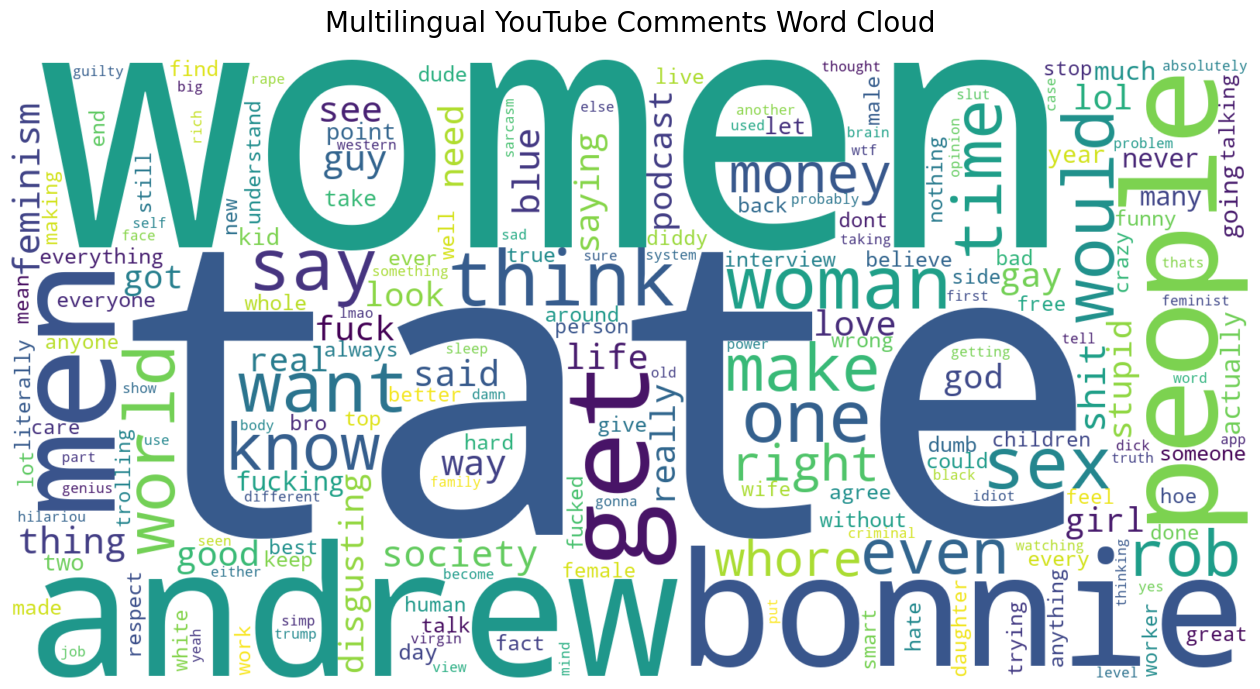

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords for multiple languages (only once)
nltk.download('stopwords')

def clean_text_for_wordcloud(text):
    """Enhanced text cleaning for multilingual support"""
    if not isinstance(text, str):
        return ""
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove emojis (optional - comment out if you want to keep them)
    emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols
        "\U0001F680-\U0001F6FF"  # transport
        "\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)
    
    # Remove punctuation and numbers
    text = re.sub(f"[{string.punctuation}0-9]", " ", text)
    
    return text.lower().strip()

# Combine stopwords from multiple languages
custom_stopwords = set()
for lang in ['english', 'spanish', 'french', 'german', 'portuguese', 'italian', 'russian']:
    try:
        custom_stopwords.update(stopwords.words(lang))
    except:
        pass

# Add common YouTube-specific filler words
custom_stopwords.update(['like', 'subscribe', 'video', 'channel', 'watch', 'thank', 'thanks', 'please', 'comment'])

# Clean and prepare text
text_data = df_with_toxic_and_sentiments['text'].apply(clean_text_for_wordcloud)
full_text = " ".join(text_data)

# Generate frequency dictionary (for debugging)
word_freq = Counter(full_text.split())
print("Top 50 words before stopwords removal:", word_freq.most_common(50))

# Remove stopwords
filtered_text = " ".join([word for word in full_text.split() if word not in custom_stopwords and len(word) > 2])

# Generate word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='viridis',
    max_words=200,
    collocations=False  # Better for multilingual
).generate(filtered_text)

# Plot
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Multilingual YouTube Comments Word Cloud", fontsize=20, pad=20)
plt.axis('off')
plt.show()

ESTO ES PARA VER LOS GRAFICOS DE BOOLEANOS

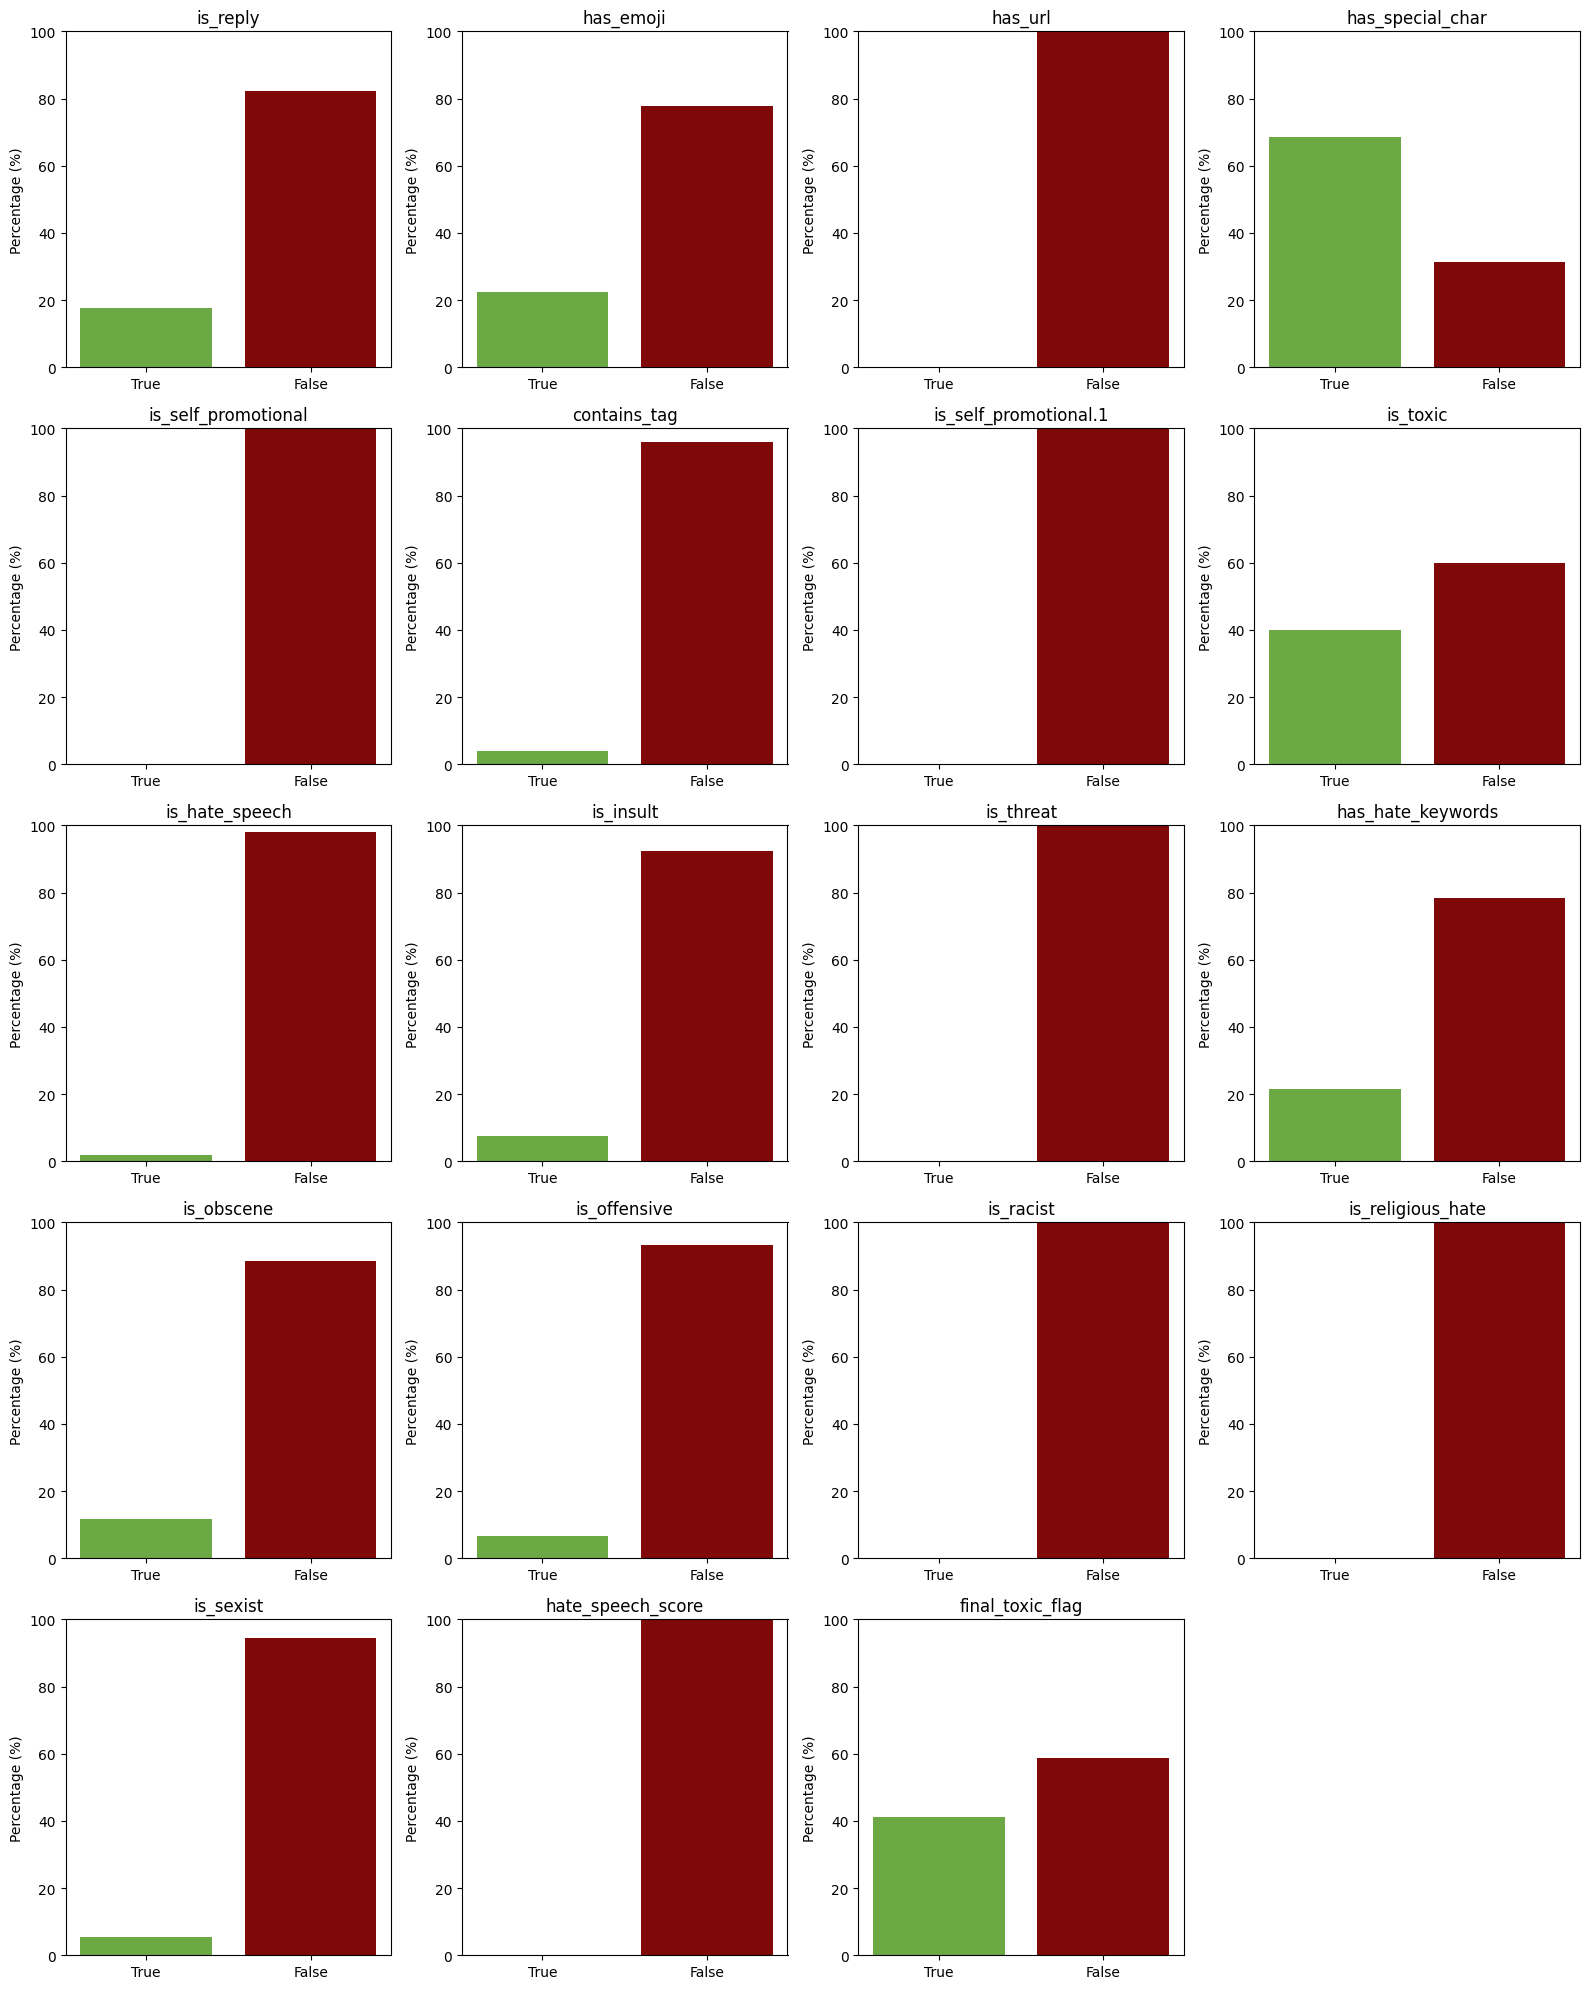

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

def is_boolean_like(series):
    """
    Check if a pandas Series is boolean-like.
    Returns True if dtype is boolean or all unique non-NaN values are 0 or 1.
    """
    try:
        if not isinstance(series, pd.Series):
            return False

        if pd.api.types.is_bool_dtype(series):
            return True

        # Get unique non-NaN values
        unique_vals = series.dropna().unique()
        return all(v in [0, 1] for v in unique_vals)

    except Exception:
        return False


def make_column_names_unique(df):
    """
    Return a copy of the DataFrame with duplicate columns renamed uniquely.
    For example, columns ['A', 'A', 'B'] -> ['A', 'A.1', 'B']
    """
    df = df.copy()
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        dup_indices = cols[cols == dup].index.tolist()
        for i, idx in enumerate(dup_indices):
            if i == 0:
                continue  # Leave first occurrence unchanged
            cols[idx] = f"{dup}.{i}"
    df.columns = cols
    return df


def plot_all_booleans_together(df):
    """
    Detect all boolean-like columns in df and plot their True/False percentages.
    Handles duplicate columns by renaming first.
    """
    # Make column names unique to avoid confusion
    df = make_column_names_unique(df)

    # Identify boolean-like columns
    bool_columns = [col for col in df.columns if is_boolean_like(df[col])]

    if not bool_columns:
        print("No boolean-like columns found in the DataFrame.")
        return

    n = len(bool_columns)
    ncols = 4
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(bool_columns):
        # Convert column to boolean type for accurate mean calculation
        df[col] = df[col].astype(bool)

        true_pct = df[col].mean() * 100
        false_pct = 100 - true_pct

        axes[i].bar(['True', 'False'], [true_pct, false_pct], color=['#6CA944', '#7F0908'])
        axes[i].set_title(col)
        axes[i].set_ylim(0, 100)
        axes[i].set_ylabel('Percentage (%)')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


# call:
plot_all_booleans_together(df_with_toxic_and_sentiments)

In [73]:
df_with_toxic_and_sentiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   thread_id             9640 non-null   object             
 1   comment_id            9640 non-null   object             
 2   video_id              9640 non-null   object             
 3   author                9640 non-null   object             
 4   author_channel_id     9640 non-null   string             
 5   is_reply              9640 non-null   bool               
 6   parent_comment_id     1715 non-null   object             
 7   published_at_comment  9640 non-null   datetime64[ns, UTC]
 8   text                  9640 non-null   object             
 9   like_count_comment    9640 non-null   int32              
 10  reply_count           9640 non-null   int32              
 11  comment_length        9640 non-null   int64              
 12  word_c

In [72]:
# Columnas objetivo
toxic_cols = [
    'is_toxic', 'is_hate_speech', 'is_insult', 'is_threat',
    'is_self_promotional', 'is_obscene', 'is_offensive',
    'is_racist', 'is_religious_hate', 'is_sexist', 'final_toxic_flag'
]

print("=== Porcentaje de True/False por columna ===")
for col in toxic_cols:
    if col in df_with_toxic_and_sentiments.columns:
        try:
            col_data = df_with_toxic_and_sentiments[col].fillna(False).astype(bool)
            true_count = int(col_data.sum())
            total = int(len(col_data))
            pct_true = 100 * true_count / total
            pct_false = 100 - pct_true
            print(f"{col}: ✅ True = {pct_true:.2f}%, False = {pct_false:.2f}% ({true_count} de {total})")
            # Now printing the total count of True values and false values
            print(f"{col}: Total True: {true_count}, Total False: {total - true_count}")
        except Exception as e:
            print(f"{col}: ⚠️ Error procesando la columna: {e}")
    else:
        print(f"{col}: ❌ No está en el DataFrame.")


=== Porcentaje de True/False por columna ===
is_toxic: ✅ True = 40.00%, False = 60.00% (3856 de 9640)
is_toxic: Total True: 3856, Total False: 5784
is_hate_speech: ✅ True = 1.96%, False = 98.04% (189 de 9640)
is_hate_speech: Total True: 189, Total False: 9451
is_insult: ✅ True = 7.51%, False = 92.49% (724 de 9640)
is_insult: Total True: 724, Total False: 8916
is_threat: ✅ True = 0.00%, False = 100.00% (0 de 9640)
is_threat: Total True: 0, Total False: 9640
is_self_promotional: ✅ True = 0.11%, False = 99.89% (11 de 9640)
is_self_promotional: Total True: 11, Total False: 9629
is_obscene: ✅ True = 11.56%, False = 88.44% (1114 de 9640)
is_obscene: Total True: 1114, Total False: 8526
is_offensive: ✅ True = 6.70%, False = 93.30% (646 de 9640)
is_offensive: Total True: 646, Total False: 8994
is_racist: ✅ True = 0.01%, False = 99.99% (1 de 9640)
is_racist: Total True: 1, Total False: 9639
is_religious_hate: ✅ True = 0.05%, False = 99.95% (5 de 9640)
is_religious_hate: Total True: 5, Total Fals

In [65]:
# Check the text column when the boolean is toxic is true and the sentiments columns beside to the toxic columns

df_with_toxic_and_sentiments[df_with_toxic_and_sentiments['final_toxic_flag'] == True][['text', 'sentiment_type', 'sentiment_intensity', 'is_toxic',
       'is_insult', 'is_threat', 'is_obscene', 'is_offensive' , 'is_sexist']].sample(10)

text sentiment_type  \
310   Nowadays women suffer tho. Men acting like pus...       positive   
7544  He humiliated himself justifying sex worker be...        neutral   
8580                 🤣🤣🤣🤣sucking little chinese peepeee        neutral   
5149  Andrew gave up man bc these hoes are too disgu...        neutral   
5785               He is like wtf is this  😂😂😂😂😂😂😂😂😂😂😂😂        neutral   
9285  at 1:45:57 Rob was like "Damn, I'm in the wron...       negative   
1252  I read this and I've come to the conclusion th...       negative   
6617  "if you're wondering my pussy is still really ...       negative   
3494  Andrew a comedian bro😂😂He speaks facts while a...        neutral   
9406  She basically is a man in a woman's body... fe...        neutral   

     sentiment_intensity  is_toxic  is_insult  is_threat  is_obscene  \
310                 weak      True       True      False       False   
7544                weak      True      False      False       False   
8580                weak      True       True      False       False   
5149                weak      True      False      False       False   
5785                weak      True      False      False       False   
9285              strong      True      False      False       False   
1252              strong      True       True      False       False   
6617              strong      True      False      False        True   
3494                weak      True      False      False        True   
9406                weak      True      False      False       False   

      is_offensive  is_sexist  
310          False      False  
7544         False      False  
8580         False      False  
5149         False       True  
5785         False      False  
9285         False      False  
1252          True      False  
6617         False      False  
3494         False      False  
9406         False      False

diccionario

| Column Name          | Description                                                                                         |
|----------------------|-----------------------------------------------------------------------------------------------------|
| thread_id            | Unique identifier for the comment thread, grouping the original comment and its replies             |
| comment_id           | Unique identifier for each individual comment                                                       |
| video_id             | Unique identifier of the YouTube video where the comment was posted                                 |
| author               | Display name of the user who posted the comment                                                    |
| author_channel_id    | Unique identifier of the YouTube channel of the comment author                                      |
| is_reply             | Boolean indicating if the comment is a reply to another comment (True) or a top-level comment (False)|
| parent_comment_id    | Identifier of the parent comment if this comment is a reply; null or empty if top-level comment     |
| published_at_comment | Timestamp when the comment was originally published                                                 |
| text                 | The textual content of the comment                                                                 |
| like_count_comment   | Number of likes that the comment has received                                                      |
| reply_count          | Number of replies the comment has (only applicable for top-level comments)                          |


In [70]:
# Mostrar columnas duplicadas para asegurarnos
print([col for col in df_with_toxic_and_sentiments.columns if col == 'is_self_promotional'])

# Eliminar columnas duplicadas, dejando solo la primera ocurrencia
df_with_toxic_and_sentiments = df_with_toxic_and_sentiments.loc[:,~df_with_toxic_and_sentiments.columns.duplicated()]

# Verificar resultado
print(df_with_toxic_and_sentiments.columns)


['is_self_promotional']
Index(['thread_id', 'comment_id', 'video_id', 'author', 'author_channel_id',
       'is_reply', 'parent_comment_id', 'published_at_comment', 'text',
       'like_count_comment', 'reply_count', 'comment_length', 'word_count',
       'has_emoji', 'has_url', 'has_special_char', 'extracted_urls',
       'is_self_promotional', 'contains_tag', 'is_toxic', 'is_hate_speech',
       'is_insult', 'is_threat', 'has_hate_keywords', 'is_obscene',
       'is_offensive', 'is_racist', 'is_religious_hate', 'is_sexist',
       'toxic_score', 'hate_speech_score', 'final_toxic_flag',
       'sentiment_type', 'sentiment_intensity'],
      dtype='object')


_______
# <center> <span style="color:#f6f794"> 💾💾💾💾💾 Saving in GitHub Compressed 💾💾💾💾💾</center>

In [74]:
# # Saving data in cleaning_file_path and in GitHub so it can be used in the next steps and the rest of the team can access it
cleaning_file_path = os.path.join(data_dir, "youtube_extract_final_ok.csv.gz")

# Saving the cleaned DataFrame to a compressed CSV file
df_with_toxic_and_sentiments.to_csv(
    cleaning_file_path,
    index=False,
    compression='gzip',
    sep=',',                  # Crucial: Specify delimiter even for compressed
    encoding='utf-8',         # Crucial: Specify encoding
    quoting=csv.QUOTE_MINIMAL # Crucial: Specify quoting behavior
)
print(f"✅ Data saved successfully at {cleaning_file_path}")

✅ Data saved successfully at c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda\data\youtube_extract_final_ok.csv.gz


In [ ]:
# # Saving the csv file in the data directory
# cleaning_file_path = os.path.join(data_dir, "youtube_dataset_checking_luigi_mangione.csv")
# # Saving the cleaned DataFrame to a CSV file
# df_youtube_extract.to_csv(
#     cleaning_file_path,
#     index=False,
#     sep=',',                  # Crucial: Specify delimiter
#     encoding='utf-8',         # Crucial: Specify encoding
#     quoting=csv.QUOTE_MINIMAL # Crucial: Specify quoting behavior
# )
# print(f"✅ Data saved successfully at {cleaning_file_path}")